In [ ]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path(__file__).parent.parent))

import jax.numpy as jnp
import jax.nn as jnn
import numpy as np

from src.pde import fd_solve, u_exact, create_grid
from src.pinn import train_pinn
from src.experiment import test_explicit_scheme_at_t, absolute_error, relative_error
from src.plotting import (
    plot_solution_at_t,
    plot_scheme_error_at_t,
    plot_3d_surface,
    subplot_3d_surfaces,
)

In [2]:
Nx1 = 10
Ny1 = 10

Nx2 = 100
Ny2 = 100
T = 1.0
c = 1.0
cfl = 0.5

t1_eval = 0.07
t2_eval = 0.30

# Constant Coefficiants

## 1D 

In [3]:
x1, t1, dx1, dt1 = create_grid(Nx=Nx1, T=T, c=c, cfl=cfl, dim=1)
x2, t2, dx2, dt2 = create_grid(Nx=Nx2, T=T, c=c, cfl=cfl, dim=1)

u_fd_1 = fd_solve(x1, t1, dx1, dt1, c=c, dim=1)
u_fd_2 = fd_solve(x2, t2, dx2, dt2, c=c, dim=1)

u_exact_1 = u_exact(x1, t1, c=c, dim=1)
u_exact_2 = u_exact(x2, t2, c=c, dim=1)

# ===== Extract solutions at specific times =====
# Find indices closest to t1, t2
idx_t1_grid1 = jnp.argmin(jnp.abs(t1 - t1_eval))
idx_t2_grid1 = jnp.argmin(jnp.abs(t1 - t2_eval))

idx_t1_grid2 = jnp.argmin(jnp.abs(t2 - t1_eval))
idx_t2_grid2 = jnp.argmin(jnp.abs(t2 - t2_eval))

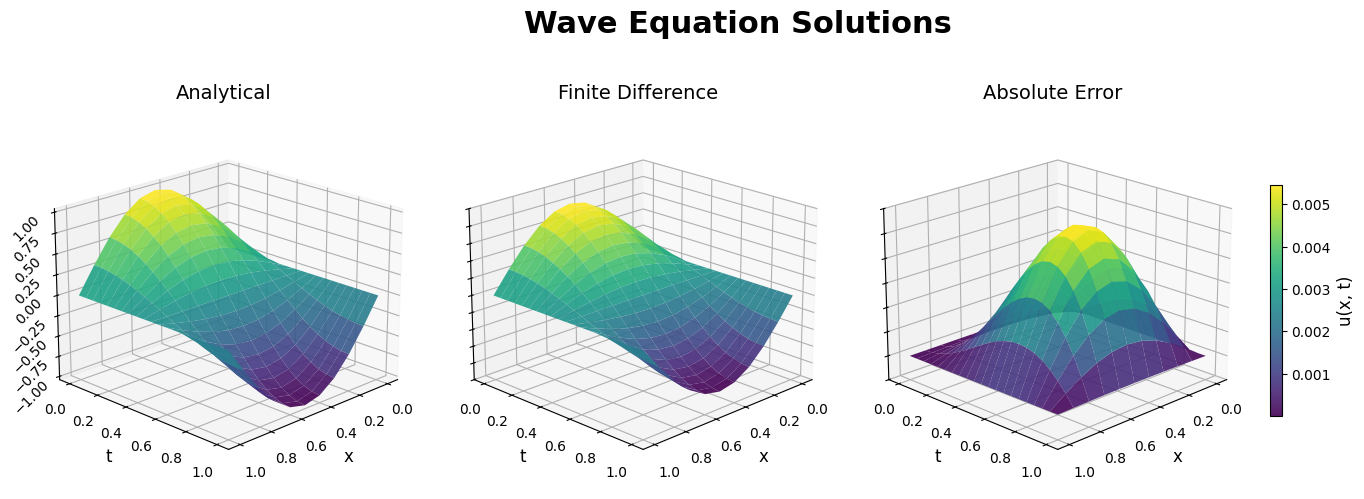

In [ ]:
fig_exact = plot_3d_surface(
    x1,
    t1,
    u_exact_1,
    elev=20,
    azim=45,
    title="Analytical Solution (1D)",
    savefig=False,
    show=False,
)

fig_fd = plot_3d_surface(
    x1,
    t1,
    u_fd_1,
    elev=20,
    azim=45,
    title="Finite Difference Solution (1D)",
    savefig=False,
    show=False,
)

fig_error = plot_3d_surface(
    x1,
    t1,
    np.abs(u_fd_1 - u_exact_1),
    elev=20,
    azim=45,
    cmap="plasma",
    colorbar_label="Absolute Error",
    title="Absolute Error (1D)",
    savefig=False,
    show=False,
)


subplot_fig = subplot_3d_surfaces(
    figures=[
        {'x': x1, 't': t1, 'U': u_exact_1},
        {'x': x1, 't': t1, 'U': u_fd_1},
        {'x': x1, 't': t1, 'U': np.abs(u_fd_1 - u_exact_1)},
    ],
    titles=["Analytical", "Finite Difference", "Absolute Error"],
    elev=20,
    azims=[45, 45, 45],
    cmap="viridis",
    colorbar_label="u(x, t)",
    suptitle="Wave Equation Solutions",
    savefig=True,
    save_path="../figs/comparison_subplot.pdf",
)

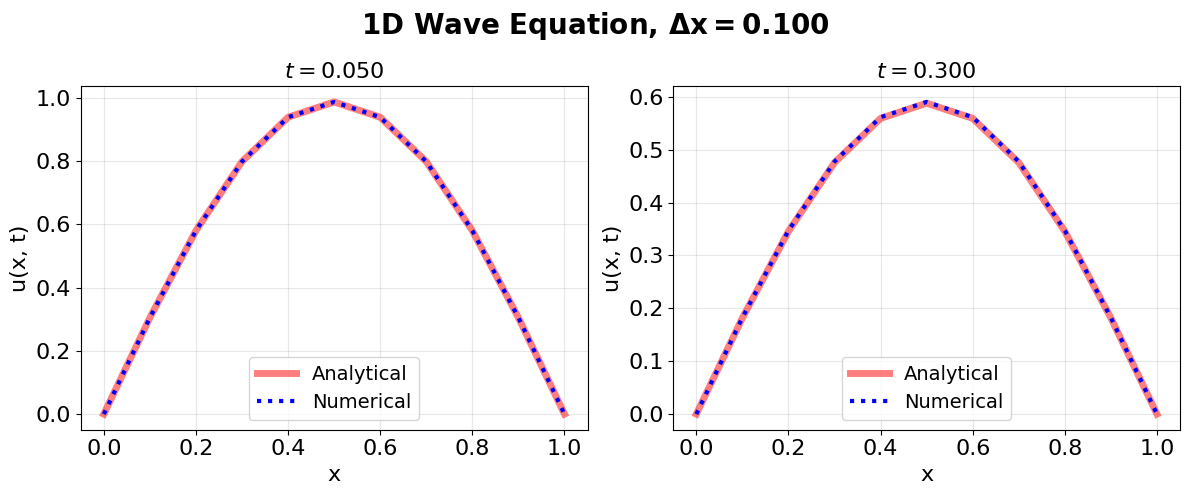

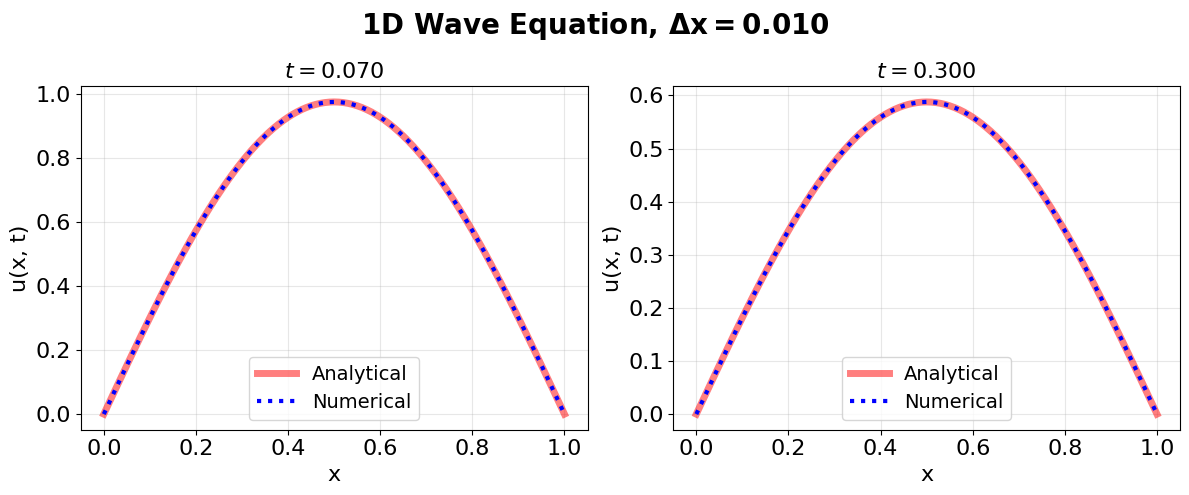

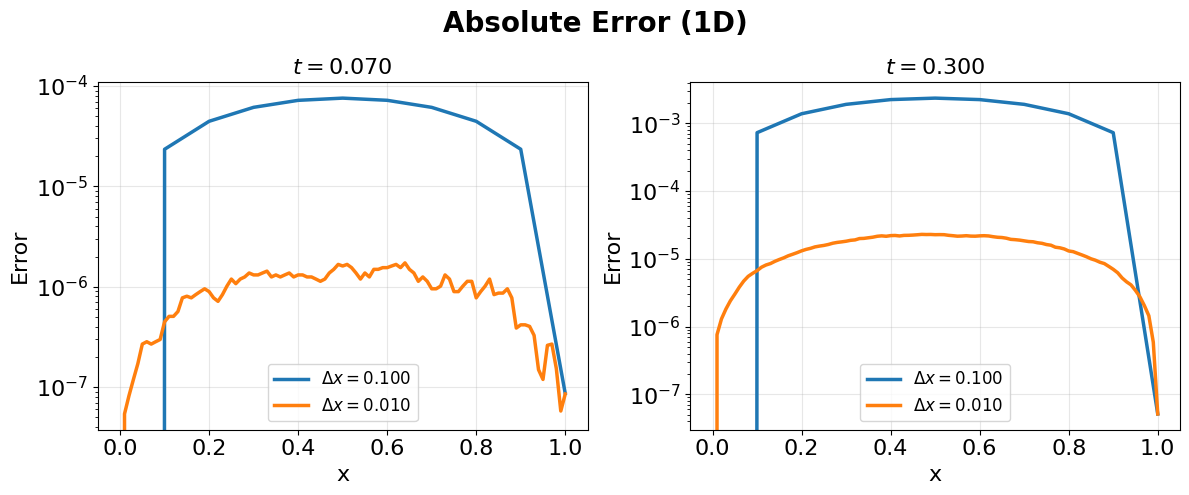

In [ ]:

# Extract solutions at t1, t2 for Nx1
fd_t1_1D_Nx1 = {
    "grid": x1,
    "u_num": u_fd_1[idx_t1_grid1, :],
    "u_true": u_exact_1[idx_t1_grid1, :],
    "dx": dx1,
    "t": float(t1[idx_t1_grid1]),
    "dim": 1
}
fd_t2_1D_Nx1 = {
    "grid": x1,
    "u_num": u_fd_1[idx_t2_grid1, :],
    "u_true": u_exact_1[idx_t2_grid1, :],
    "dx": dx1,
    "t": float(t1[idx_t2_grid1]),
    "dim": 1
}


# Extract solutions at t1, t2 for Nx2
fd_t1_1D_Nx2 = {
    "grid": x2,
    "u_num": u_fd_2[idx_t1_grid2, :],
    "u_true": u_exact_2[idx_t1_grid2, :],
    "dx": dx2,
    "t": float(t2[idx_t1_grid2]),
    "dim": 1
}
fd_t2_1D_Nx2 = {
    "grid": x2,
    "u_num": u_fd_2[idx_t2_grid2, :],
    "u_true": u_exact_2[idx_t2_grid2, :],
    "dx": dx2,
    "t": float(t2[idx_t2_grid2]),
    "dim": 1
}


# ===== Solutions for Nx1 =====
plot_solution_at_t(
    grid=[fd_t1_1D_Nx1["grid"], fd_t2_1D_Nx1["grid"]],
    u_num=[fd_t1_1D_Nx1["u_num"], fd_t2_1D_Nx1["u_num"]],
    u_true=[fd_t1_1D_Nx1["u_true"], fd_t2_1D_Nx1["u_true"]],
    dx=fd_t1_1D_Nx1["dx"],
    t=[fd_t1_1D_Nx1["t"], fd_t2_1D_Nx1["t"]],
    dim=fd_t1_1D_Nx1["dim"],
    filepath=f"../figs/solution_1D_Nx{Nx1}_dx{fd_t1_1D_Nx1['dx']:.3f}.pdf",
)

# ===== Solutions for Nx2 =====
plot_solution_at_t(
    grid=[fd_t1_1D_Nx2["grid"], fd_t2_1D_Nx2["grid"]],
    u_num=[fd_t1_1D_Nx2["u_num"], fd_t2_1D_Nx2["u_num"]],
    u_true=[fd_t1_1D_Nx2["u_true"], fd_t2_1D_Nx2["u_true"]],
    dx=fd_t1_1D_Nx2["dx"],
    t=[fd_t1_1D_Nx2["t"], fd_t2_1D_Nx2["t"]],
    dim=fd_t1_1D_Nx2["dim"],
    filepath=f"../figs/solution_1D_Nx{Nx2}_dx{fd_t1_1D_Nx2['dx']:.3f}.pdf",
)

abs_error_data_1D = [
    # Nx1 data
    {
        'grid': fd_t1_1D_Nx1["grid"],
        'error': [
            absolute_error(fd_t1_1D_Nx1["u_num"], fd_t1_1D_Nx1["u_true"]),
            absolute_error(fd_t2_1D_Nx1["u_num"], fd_t2_1D_Nx1["u_true"])
        ],
        'dx': fd_t1_1D_Nx1["dx"]
    },
    # Nx2 data
    {
        'grid': fd_t1_1D_Nx2["grid"],
        'error': [
            absolute_error(fd_t1_1D_Nx2["u_num"], fd_t1_1D_Nx2["u_true"]),
            absolute_error(fd_t2_1D_Nx2["u_num"], fd_t2_1D_Nx2["u_true"])
        ],
        'dx': fd_t1_1D_Nx2["dx"]
    }
]



plot_scheme_error_at_t(
    grid=abs_error_data_1D,
    error=None,
    dx=None,
    t=[t1_eval, t2_eval],
    dim=1,
    title="Absolute Error (1D)",
    filepath="../figs/abs_error_multi_dx_1D.pdf",
    log_scale=True,
)


## 2D

In [7]:
Nx = 100
Ny = 100
T = 1.0
c = 1.0
cfl = 0.5

x, y, t, dx, dy, dt =create_grid(Nx=Nx, Ny=Ny, T=T, c=c, cfl=cfl, dim=2)

u_exact_2D = u_exact(x, t, y, c=c, dim=2)
u_fd_2D = fd_solve(x, t, dx, dt, y, dy, c=c, dim=2)

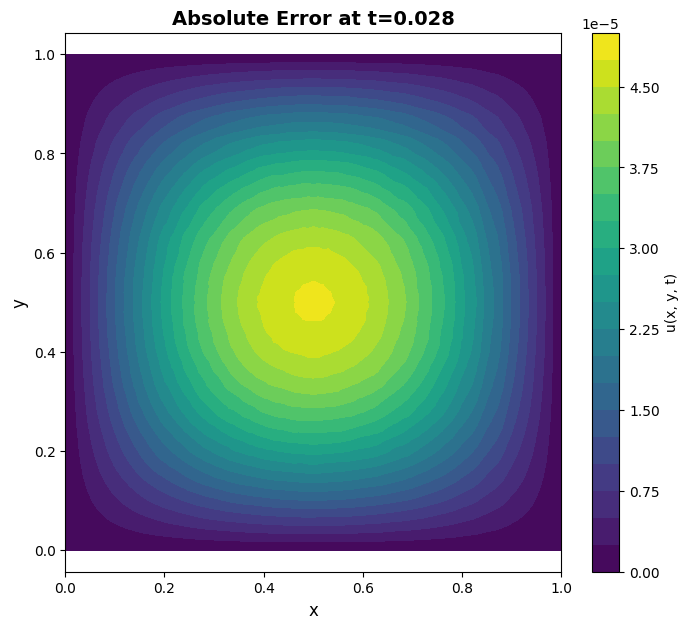

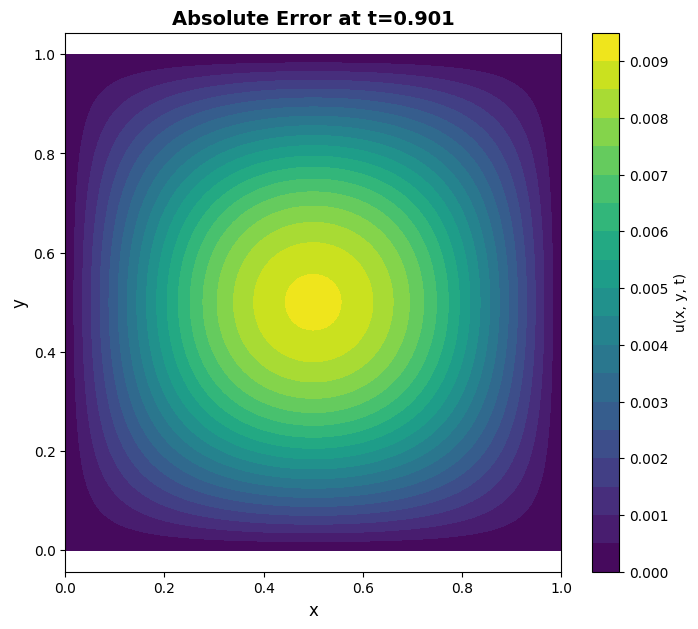

In [ ]:
import matplotlib.pyplot as plt 
def plot_2d_heatmap(x, y, t, U, t_eval, title="", save_path=None):

    # Finn nærmeste tidspunkt
    idx = np.argmin(np.abs(t - t_eval))
    
    # Lag heatmap
    plt.figure(figsize=(8, 7))
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, U[idx, :, :].T, levels=20, cmap='viridis')
    plt.colorbar(label='u(x, y, t)')
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'{title} at t={t[idx]:.3f}', fontsize=14, fontweight='bold')
    plt.axis('equal')
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()


# Bruk:

plot_2d_heatmap(x, y, t, np.abs(u_fd_2D - u_exact_2D), t_eval=0.03,
                title="Absolute Error",
                save_path="../figs/error_2d.pdf")

plot_2d_heatmap(x, y, t, np.abs(u_fd_2D - u_exact_2D), t_eval=0.9,
                title="Absolute Error",
                save_path="../figs/error_2d_03.pdf")

# Space dependent coefficients

## 1D